In [473]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


# Exploration des données 

### Chargement du dataset csv avec pandas

In [474]:
df= pd.read_csv(r'C:\Users\Brayan\Downloads\SuperMarket Analysis.csv')

### Affichage des 5 premières lignes

In [475]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [476]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

### Affichage du nombre de ligne et de colonnes

In [477]:
print(f'Nombre de lignes : {df.shape[0]} \nNombre de colonnes: {df.shape[1]}')


Nombre de lignes : 1000 
Nombre de colonnes: 17


### Vérification des types de données

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Nettoyage

### Vérification des données dupliquées

In [479]:
df.duplicated().sum()

np.int64(0)

### Convertion de la colonne Date en datetime

In [480]:
df.Date = pd.to_datetime(df['Date'],  errors= 'coerce' )


In [481]:
df.Date

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

### Vérification de valeurs aberantes dans Quantity

In [482]:
df.Quantity.value_counts()

Quantity
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: count, dtype: int64

# Création de colonnes

### Création de colonnes Mont et Year à partir de date 

In [483]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month

# Analyse du business

### Chiffre d'affaire total

In [484]:
print("Le chifffre d'affaire total de la sucurssale est : ", df.Sales.astype('int').sum())


Le chifffre d'affaire total de la sucurssale est :  322469


### La ville la plus rentable

In [485]:
ville = df.groupby('City')['gross income'].sum().sort_values(ascending = False).idxmax()
revenue = df.groupby('City')['gross income'].sum().sort_values(ascending = False).max()

In [486]:

print(f'La ville la pus rentable  est {ville}, avec un revenu brute de {revenue:.2f}$')


La ville la pus rentable  est Naypyitaw, avec un revenu brute de 5265.18$


Text(0.5, 1.0, 'Total des revenues par villes ')

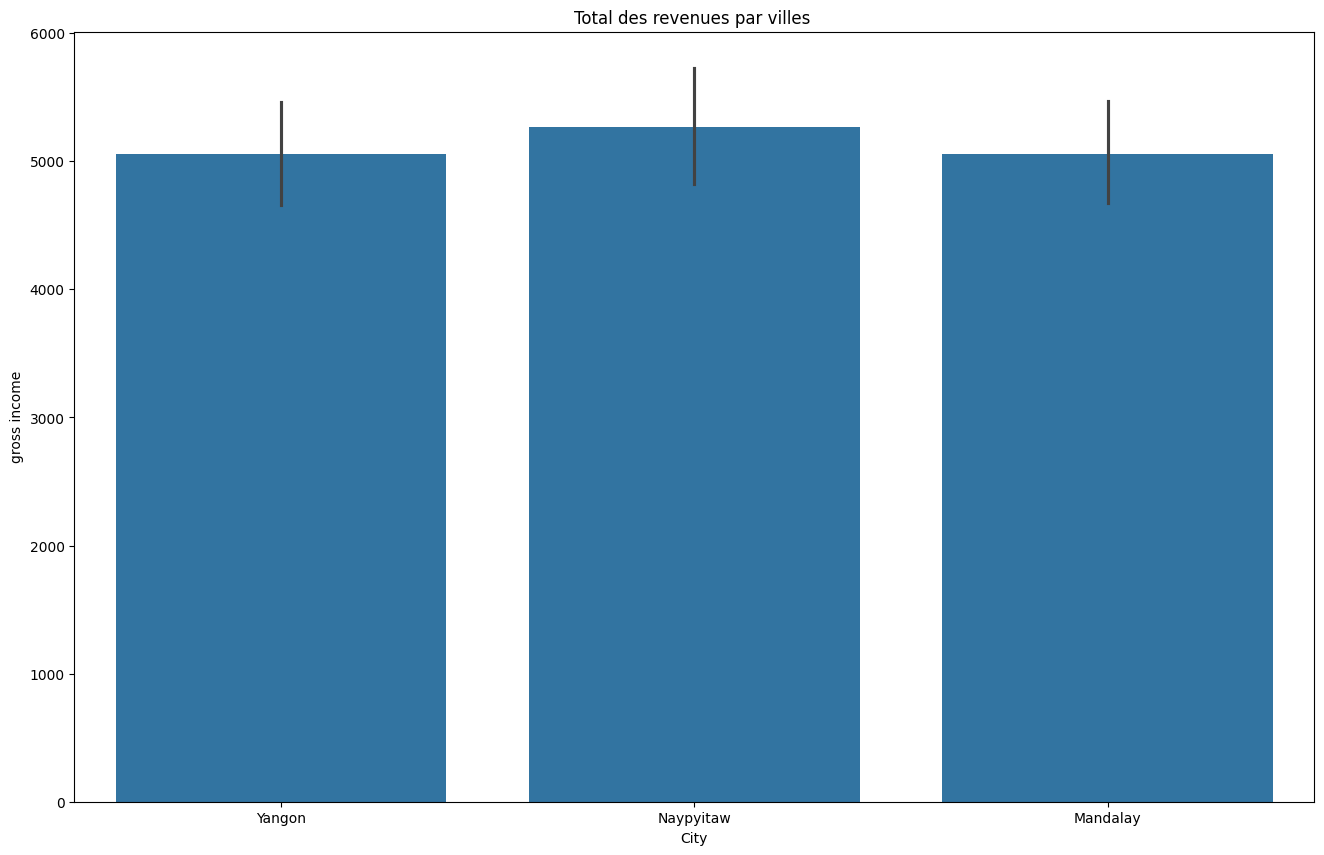

In [487]:
plt.figure(figsize=(16,10))
sns.barplot(data =  df, x='City', y='gross income', estimator= sum)
plt.title('Total des revenues par villes ')

### Produit le plus vendu

In [488]:
produit = df.groupby('Product line')['Sales'].sum().idxmax()
prix = df.groupby('Product line')['Sales'].sum().max()

In [489]:
print (f'Le produit le plus vendu est {produit} avec un total de {prix:.2f}$ ' )

Le produit le plus vendu est Food and beverages avec un total de 56144.84$ 


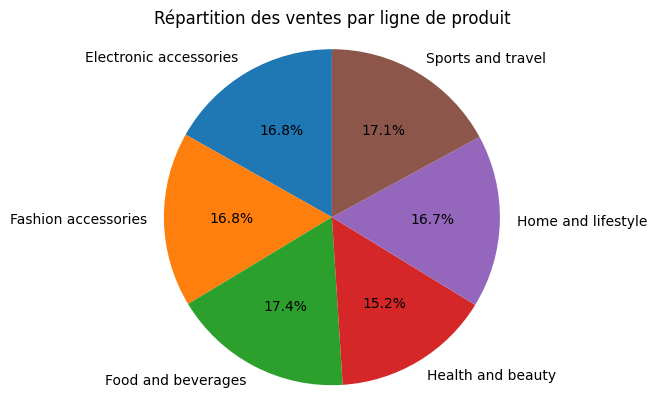

In [490]:
produit = df.groupby('Product line')['Sales'].sum()
plt.figure()
plt.pie(
    produit.values,
    labels=produit.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Répartition des ventes par ligne de produit")
plt.axis("equal")  
plt.show()

### La méthode de paiement la plus utilisée

In [491]:
print ( 'la méthode de paiement la plus utilisée est : ', df.Payment.value_counts().sort_values(ascending=False).idxmax())

la méthode de paiement la plus utilisée est :  Ewallet


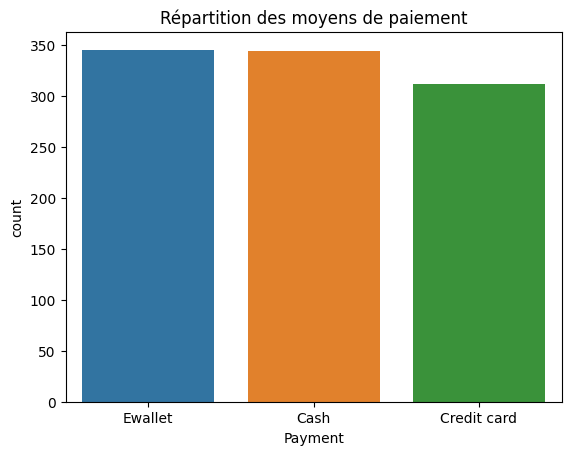

In [492]:
sns.countplot(data=df, x="Payment", hue = "Payment")
plt.title("Répartition des moyens de paiement")
plt.show()

### Chiffre d'affaire par ville 

In [493]:
vente_par_ville = df.groupby('City')['Sales'].sum().sort_values(ascending=False)


In [494]:
print(vente_par_ville)

City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Sales, dtype: float64


Text(0.5, 1.0, "Chiffre d'affaire par ville")

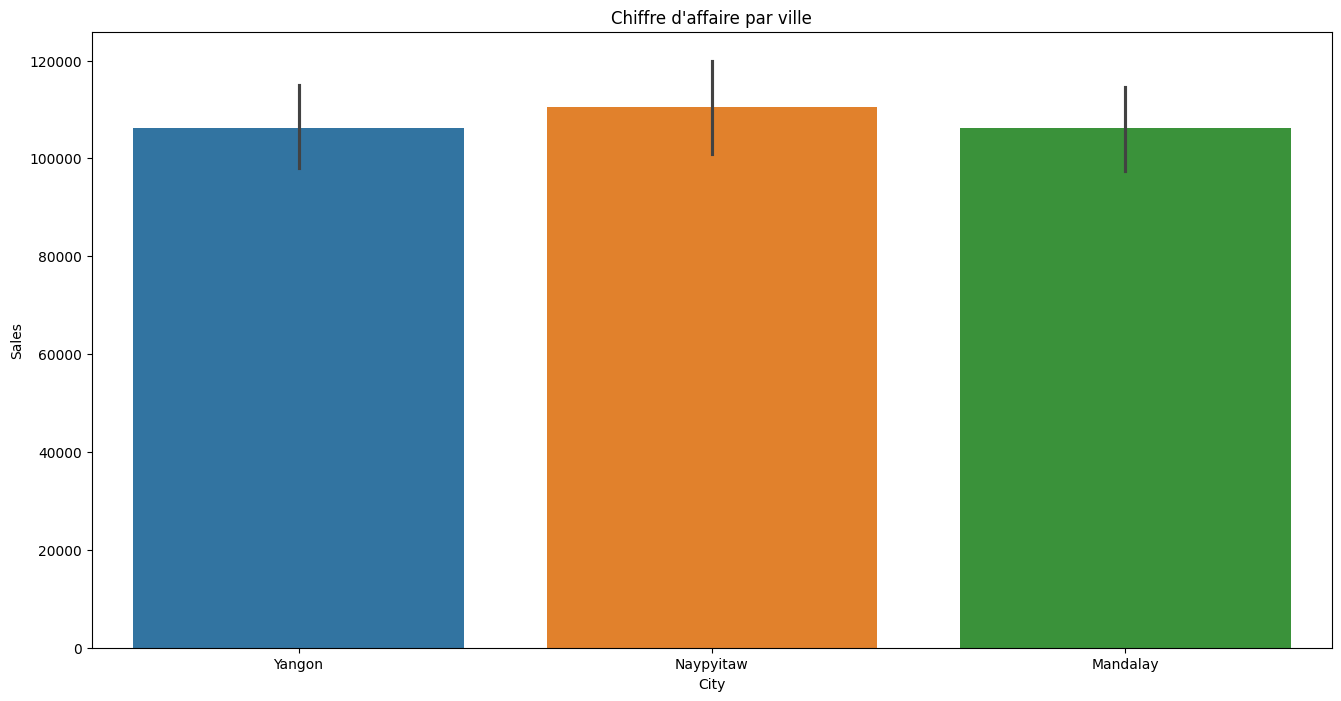

In [495]:
plt.figure(figsize=(16,8))
sns.barplot(data =  df, x = 'City', y = 'Sales', hue = 'City', estimator= sum)
plt.title('Chiffre d\'affaire par ville')

### Chiffre d'affaire par mois

In [496]:
Ventes_par_mois = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)

In [497]:
print (Ventes_par_mois)

Month
1    116291.868
3    109455.507
2     97219.374
Name: Sales, dtype: float64


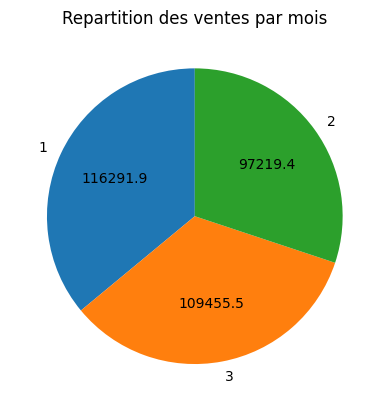

In [498]:
plt.pie(Ventes_par_mois,
        labels=Ventes_par_mois.index,
        autopct=lambda p: f"{p*Ventes_par_mois.sum()/100:.1f}",
        startangle=90)
plt.title('Repartition des ventes par mois')
plt.show()

### Quantité moyenne par type de client

In [499]:
df.groupby('Customer type')['Quantity'].mean()

Customer type
Member    5.630088
Normal    5.354023
Name: Quantity, dtype: float64

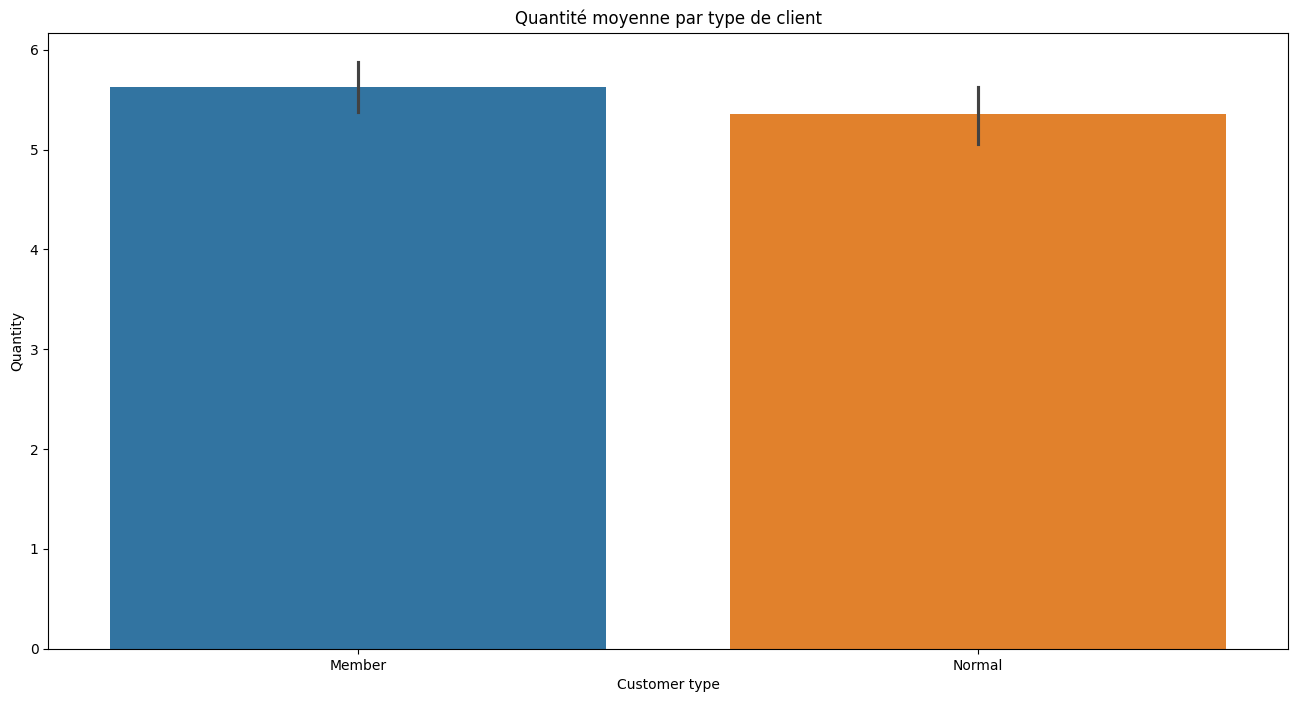

In [509]:
plt.figure(figsize=(16,8))
sns.barplot(data = df ,x = 'Customer type', y= 'Quantity',hue = 'Customer type', estimator= np.mean)
plt.title('Quantité moyenne par type de client')
plt.show()

### Moyenne et écart-type du chiffre d'affaires  

In [501]:
print('La moyenne du chiffre d\'affaire est : ', round (df.Sales.mean(),2 ))



La moyenne du chiffre d'affaire est :  322.97


In [502]:
print('L\' écart-type du chiffre d\'affaire est : ', round (df.Sales.std() ,2 ))

L' écart-type du chiffre d'affaire est :  245.89


### Identification des ventes anormales

In [512]:
q1 = df.Sales.quantile(0.25)
q3 = df.Sales.quantile(0.75)
iqr = q3 - q1

lower_band = q1 - 1.5*iqr
upper_band = q3 + 1.5*iqr
print (lower_band)
print (upper_band)

print(df[(df.Sales < lower_band ) | (df.Sales > upper_band )].Sales.unique())

-395.9694375
991.7420625
[1003.59  1039.29  1042.65  1002.12  1020.705 1034.46  1023.75  1022.385
 1022.49 ]


### Ajout de la colonne 'Outlier'

In [504]:
df['Outlier'] = (df.Sales < lower_band ) | (df.Sales > upper_band )
df.Outlier.head(5)

0    False
1    False
2    False
3    False
4    False
Name: Outlier, dtype: bool

### Top 5 des produits par revenu

In [505]:
df.groupby('Product line').Sales.sum().sort_values(ascending=False).head(5)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Name: Sales, dtype: float64

### Évaluation des ventes mensuelles

In [506]:
df.groupby(['Year','Month']).Sales.sum()

Year  Month
2019  1        116291.868
      2         97219.374
      3        109455.507
Name: Sales, dtype: float64